<a href="https://colab.research.google.com/github/ParthaT123/My_repo1/blob/main/EDA%26simpleXgbRegModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Import some libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [ ]:
## Check the directory
import os

path = os.getcwd()

print(path)

C:\Users\parth\Downloads


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# ## For Gdrive and Colab

# # Code to read csv file into Colaboratory:
# # !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

In [ ]:
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [ ]:
# trn_link= 'https://drive.google.com/open?id=1Sn6JgwidSOQJwFcrk0gTV36nLXF3R52K'
# # https://drive.google.com/file/d/1Sn6JgwidSOQJwFcrk0gTV36nLXF3R52K/view?usp=sharing
# # tst_link = 'https://drive.google.com/open?id=11xTe8DtaWiDw6OMpWoWOWSmt0qOdfDWE'
# # https://drive.google.com/file/d/1zFBEiCJ081wRtXBdPjOn90bVQ9sa-ysY/view?usp=sharing
# # https://drive.google.com/file/d/11xTe8DtaWiDw6OMpWoWOWSmt0qOdfDWE/view?usp=sharing

In [ ]:
# fluff, id = trn_link.split('=')
# print (id) # Verify that you have everything after '='

1Sn6JgwidSOQJwFcrk0gTV36nLXF3R52K


In [ ]:
pwd

'/content'

In [ ]:
train = pd.read_csv("C:/Users/parth/Downloads/Sample_Data (1).csv")
# train = pd.read_excel(r'C:\Users\pronay_sarkar\Documents\Pronay_PG Analytics\Projects & Adhocs\Commodity Pricing\Model Details\Sample_Data.xlsx', sheet_name = 'Sample Data', skiprows = 0)
# Dataset is now stored in a Pandas Dataframe
# downloaded_trn = drive.CreateFile({'id':id}) 
# downloaded_trn.GetContentFile('Sample_Data.csv')  
# train = pd.read_csv('Sample_Data.csv')

In [ ]:
# # Dataset is now stored in a Pandas Dataframe
# downloaded_trn = drive.CreateFile({'id':id}) 
# downloaded_trn.GetContentFile('Sample_Data.csv')  
# train = pd.read_csv('Sample_Data.csv')

In [ ]:
train.shape

(113, 13)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unique_SKU_Model          113 non-null    object 
 1   Vendor                    92 non-null     object 
 2   Encryption                113 non-null    object 
 3   Use                       113 non-null    object 
 4   Capacity_GB               113 non-null    int64  
 5   Type                      113 non-null    object 
 6   Bus                       113 non-null    object 
 7   Average of New Price      113 non-null    float64
 8   Average of Selling Price  113 non-null    float64
 9   Sum of Units              113 non-null    int64  
 10  Average of Discount       113 non-null    float64
 11  AVG HP Price              113 non-null    float64
 12  Elasticity Coefficint     113 non-null    float64
dtypes: float64(5), int64(2), object(6)
memory usage: 11.6+ KB


In [ ]:
train.Unique_SKU_Model.nunique()

113

In [ ]:
## Function for calculating missing percentages in a dataframe
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])



## Boxplot and Histogtam 
def histPlot(var, bins = None):
    plot = var.plot(kind='hist', title =var.name,use_index = True, alpha=0.5, bins=bins, figsize = (7,5))
    
def boxPlot(var):
    color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange',  'medians': 'DarkBlue', 'caps': 'Gray'}
    plot = var.plot(kind='box', title =var.name,
                                               figsize = (7,7), color=color, sym='r+')
    
    
## Frequency Distribution Plot for Categorical Vars
def freq_dist_cat(var, fig_size = (None,None)):
    plot = var.value_counts(normalize=True).plot(kind='bar', title =var.name,
                                              use_index = True, figsize = fig_size)
    plot.set_ylabel("Freq Distn. of  "+ var.name)
    
def freq_dist_cat_idx_sort(var, fig_size = (None,None)):
    plot = var.value_counts(normalize=True).sort_index().plot(kind='bar', title =var.name,
                                              use_index = True, figsize = fig_size)
    plot.set_ylabel("Freq Distn. of  "+ var.name)

def var_distn(listVar):
    for i in range(len(listVar)):
        print("###############################")
        print(listVar[i])
        print("-------------------------------")
        print(train[['Loan_Status',listVar[i]]].groupby(listVar[i]).describe() )
        print("###############################")

def univar_dist(df,x, bins = None, kde = None):
    
    sns.set(style = 'ticks')
    f, (ax_box, ax_hist) = plt.subplots(2, sharex =True, gridspec_kw = {"height_ratios":(30,70)})
    ax_box.set_title(str(x), fontsize=16)

    sns.distplot(df[x], kde = kde, bins = bins, ax= ax_hist)
    sns.boxplot(df[x], ax = ax_box)

    ax_box.set(yticks = [])
    sns.despine(ax= ax_hist)
    sns.despine(ax= ax_box, left = True)

## Defining a function to look at Loan_Status across different bins of continuous variables
def freq_cont1var(dataframe, groupbycol1, aggregate_col,bins=None):
    
        
    df = pd.DataFrame(dataframe[[groupbycol1]])
    df = df.apply(lambda x: pd.qcut(x,  bins, duplicates  = "drop"), axis=0)
    df = pd.DataFrame(df)
    df = pd.DataFrame(df.join(dataframe[aggregate_col]))
    crs1 = df.groupby(groupbycol1).mean()*100
    crs1 = crs1.reset_index(drop = False)

    print(crs1)
    return crs1

def bivar_plt(df, var , bins = None):
    print("Variable Name : " + str(var) + "(by Approval Pct of Loan)")
    print("#######################################################################") 
    age = freq_cont1var(df, var, "Loan_Status", bins)
    print("#######################################################################")
    print("\n")
    print("#######################################################################")
    # age.plot.bar(x=var, y='Loan_Status', rot=0, figsize = (12,5),color = "maroon")

In [ ]:
missing_data(train)

,Total,Missing Percent
Vendor,21,18.584071
Elasticity Coefficint,0,0.000000
AVG HP Price,0,0.000000
Average of Discount,0,0.000000
Sum of Units,0,0.000000
Average of Selling Price,0,0.000000
Average of New Price,0,0.000000
Bus,0,0.000000
Type,0,0.000000
Capacity_GB,0,0.000000


In [ ]:
train["Vendor"] = train["Vendor"].fillna("Unknown_Vendor")

In [ ]:
train.corr() ## only for numerical variables as of now

,Capacity_GB,Average of New Price,Average of Selling Price,Sum of Units,Average of Discount,AVG HP Price,Elasticity Coefficint
Capacity_GB,1.000000,0.349376,0.351095,0.025697,0.085219,0.348337,0.160055
Average of New Price,0.349376,1.000000,0.934301,-0.207468,0.428562,0.999967,-0.036342
Average of Selling Price,0.351095,0.934301,1.000000,-0.230975,0.156791,0.933736,-0.039217
Sum of Units,0.025697,-0.207468,-0.230975,1.000000,-0.012342,-0.206943,0.053558
Average of Discount,0.085219,0.428562,0.156791,-0.012342,1.000000,0.429493,-0.103736
AVG HP Price,0.348337,0.999967,0.933736,-0.206943,0.429493,1.000000,-0.036510
Elasticity Coefficint,0.160055,-0.036342,-0.039217,0.053558,-0.103736,-0.036510,1.000000


In [ ]:
train.corr(method = "spearman")

,Capacity_GB,Average of New Price,Average of Selling Price,Sum of Units,Average of Discount,AVG HP Price,Elasticity Coefficint
Capacity_GB,1.000000,0.511699,0.507287,-0.197603,0.140672,0.510138,0.128618
Average of New Price,0.511699,1.000000,0.954344,-0.326063,0.507050,0.999763,-0.075314
Average of Selling Price,0.507287,0.954344,1.000000,-0.353703,0.301713,0.953458,-0.075713
Sum of Units,-0.197603,-0.326063,-0.353703,1.000000,0.023906,-0.326363,0.124849
Average of Discount,0.140672,0.507050,0.301713,0.023906,1.000000,0.508007,-0.118493
AVG HP Price,0.510138,0.999763,0.953458,-0.326363,0.508007,1.000000,-0.076733
Elasticity Coefficint,0.128618,-0.075314,-0.075713,0.124849,-0.118493,-0.076733,1.000000


In [ ]:
import seaborn as sns

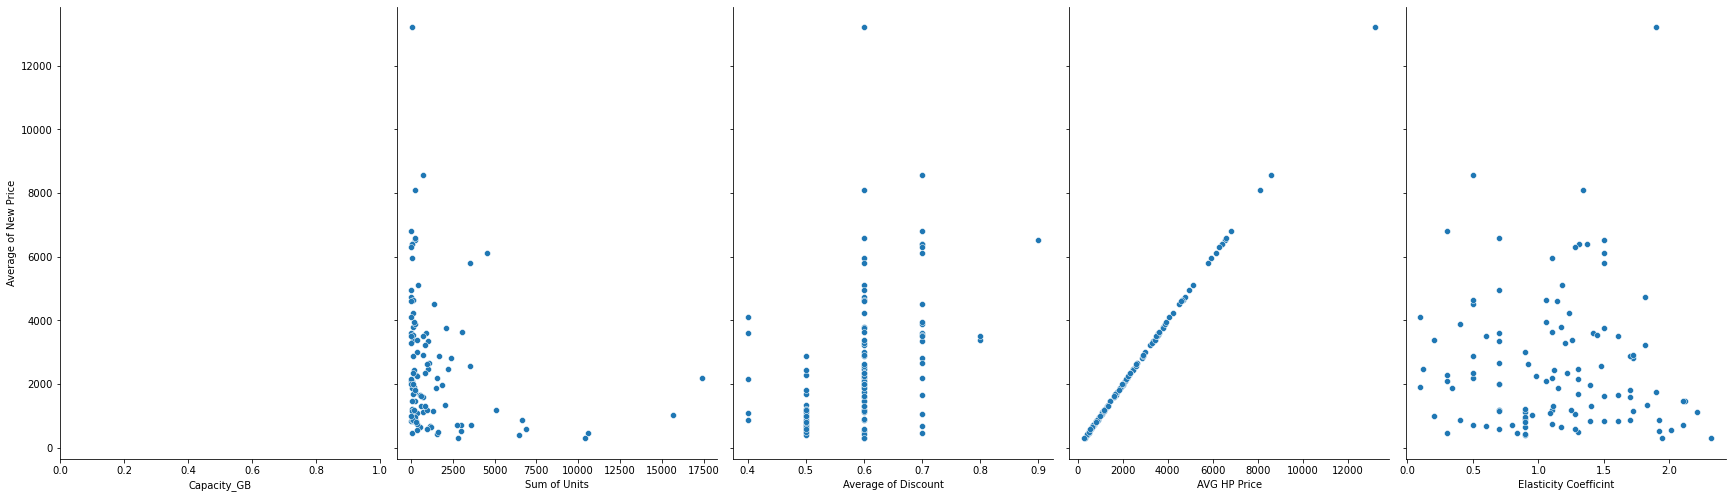

In [ ]:
sns.pairplot(train, x_vars=['Capacity_GB', 
       'Sum of Units', 'Average of Discount', 'AVG HP Price',
       'Elasticity Coefficint'], y_vars='Average of New Price', size=7, aspect=0.7)

In [ ]:
num_cols = train.select_dtypes(include = ['int','float64','int32','float64','int64']).columns
num_cols
cat_cols = train.select_dtypes(include = ['object','category']).columns
cat_cols

Index(['Unique_SKU_Model', 'Vendor', 'Encryption', 'Use', 'Type', 'Bus'], dtype='object')

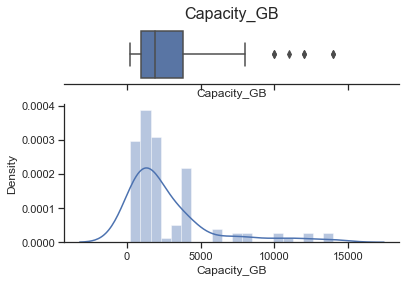

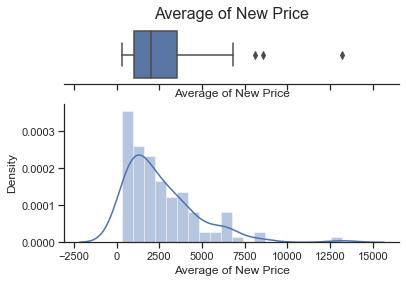

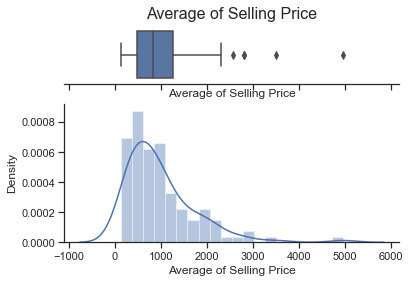

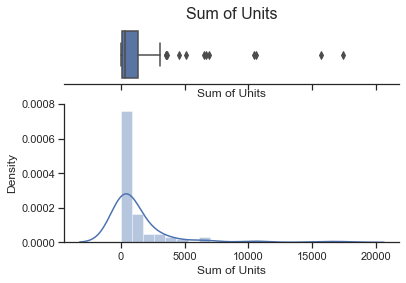

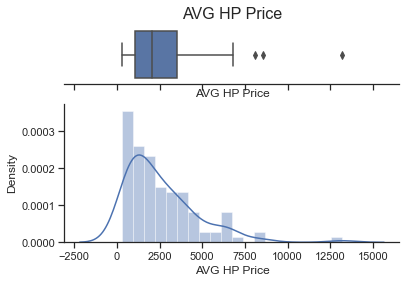

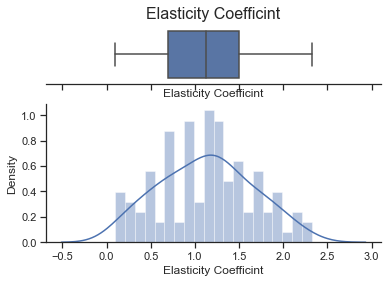

In [ ]:
for var in num_cols:
    if train[var].nunique() >= 10:
       univar_dist(train[num_cols],var, bins = 20,kde =True)

In [ ]:
## Defining a function to look at Loan_Status across different bins of continuous variables
def freq_cont1var(dataframe, groupbycol1, aggregate_col,bins=None):
    
        
    df = pd.DataFrame(dataframe[[groupbycol1]])
    df = df.apply(lambda x: pd.qcut(x,  bins, duplicates  = "drop"), axis=0)
    df = pd.DataFrame(df)
    df = pd.DataFrame(df.join(dataframe[aggregate_col]))
    crs1 = df.groupby(groupbycol1).mean()
    crs1 = crs1.reset_index(drop = False)

    print(crs1)
    return crs1

def bivar_plt(df, var , bins = None):
    print("Variable Name : " + str(var) + "(by Avg Average of New Price)")
    print("#######################################################################") 
    age = freq_cont1var(df, var, 'Average of New Price', bins)
    print("#######################################################################")
    print("\n")
    print("#######################################################################")
    # age.plot.bar(x=var, y='Loan_Status', rot=0, figsize = (12,5),color = "maroon")

def bivar_plt2(df, var ):
    print("Variable Name : " + str(var) + "(by Avg Average of New Price)")
    print("#######################################################################") 
    # age = freq_cont1var(df, var, 'Average of New Price', bins)
    # df[var].value_counts()/df.shape[0])
    print(df[['Average of New Price', var]].groupby(var).mean())
    print("#######################################################################")
    print("\n")
    print("#######################################################################")
    # age.plot.bar(x=var, y='Loan_Status', rot=0, figsize = (12,5),color = "maroon")

In [ ]:
cat_cols_1 = [ 'Vendor', 'Encryption', 'Use', 'Type', 'Bus']
            #  ['Unique_SKU_Model', 'Vendor', 'Encryption', 'Use', 'Type', 'Bus']

In [ ]:
num_cols_1 = ['Capacity_GB', 
       'Sum of Units', 'Average of Discount', 'AVG HP Price',
       'Elasticity Coefficint']

In [ ]:
## Bi-variate distribution
for var in num_cols_1:
    if train[var].nunique() >= 10:
       bivar_plt(train, var , bins = 10)
      #  univar_dist(train[cols],var, bins = 20,kde =True)

Variable Name : Capacity_GB(by Avg Average of New Price)
#######################################################################
         Capacity_GB  Average of New Price
0   (239.999, 480.0]           1054.500000
1     (480.0, 924.0]           1811.883333
2     (924.0, 960.0]           1256.787500
3    (960.0, 1600.0]           2591.150000
4   (1600.0, 1920.0]           2505.910000
5   (1920.0, 3200.0]           3456.088889
6   (3200.0, 3840.0]           4696.846154
7   (3840.0, 6320.0]           2617.966667
8  (6320.0, 14000.0]           4127.800000
#######################################################################


#######################################################################
Variable Name : Sum of Units(by Avg Average of New Price)
#######################################################################
        Sum of Units  Average of New Price
0      (1.999, 22.4]           3701.908333
1       (22.4, 66.8]           3593.609091
2      (66.8, 122.6]           2791.

In [ ]:
## Bi-variate distribution
for var in num_cols_1:
    if train[var].nunique() < 10:
       bivar_plt(train, var , bins = 4 )

Variable Name : Average of Discount(by Avg Average of New Price)
#######################################################################
  Average of Discount  Average of New Price
0        (0.399, 0.5]           1257.108824
1          (0.5, 0.6]           2820.657143
2          (0.6, 0.9]           4000.321739
#######################################################################


#######################################################################


In [ ]:
## Bi-variate distribution
for var in cat_cols_1:
       bivar_plt2(train, var )
      #  univar_dist(train[cols],var, bins = 20,kde =True)

Variable Name : Vendor(by Avg Average of New Price)
#######################################################################
                Average of New Price
Vendor                              
Agnostic                 2045.577778
Intel                    2891.176000
Micron                   4324.000000
Samsung                  3298.515000
Toshiba                  3113.692000
Unknown_Vendor           1071.309524
#######################################################################


#######################################################################
Variable Name : Encryption(by Avg Average of New Price)
#######################################################################
            Average of New Price
Encryption                      
Regular              2545.170755
SED                  3273.971429
#######################################################################


#######################################################################
Variable Name : Use(by Avg A

In [ ]:
train.columns

Index(['Unique_SKU_Model', 'Vendor', 'Encryption', 'Use', 'Capacity_GB',
       'Type', 'Bus', 'Average of New Price', 'Average of Selling Price',
       'Sum of Units', 'Average of Discount', 'AVG HP Price',
       'Elasticity Coefficint'],
      dtype='object')

In [ ]:
# Variable Name : Vendor(by Avg Average of New Price)
# #######################################################################
#                 Average of New Price
# Vendor                              
# Agnostic                 2045.577778
# Intel                    2891.176000
# Micron                   4324.000000
# Samsung                  3298.515000
# Toshiba                  3113.692000
# Unknown_Vendor           1071.309524

train["Vendor_Agnostic"] = np.where(train["Vendor"].isin(["Agnostic"]) , 1,0 )
train["Vendor_Intel"] = np.where(train["Vendor"].isin(["Intel"]) , 1,0 )
train["Vendor_Micron"] = np.where(train["Vendor"].isin(["Micron"]) , 1,0 )
train["Vendor_Samsung"] = np.where(train["Vendor"].isin(["Samsung"]) , 1,0 )
train["Vendor_Toshiba"] = np.where(train["Vendor"].isin(["Toshiba"]) , 1,0 )


In [ ]:
# Variable Name : Encryption(by Avg Average of New Price)
# #######################################################################
#             Average of New Price
# Encryption                      
# Regular              2545.170755
# SED                  3273.971429
train["Encryption_Regular"] = np.where(train["Encryption"].isin(["Regular"]) , 1,0 )
train["Encryption_SED"] = np.where(train["Encryption"].isin(["SED"]) , 1,0 )

In [ ]:
#          Average of New Price
# Use                          
# MU                3089.770588
# RI                2789.046000
# Regular           1071.309524
# WI                3212.987500

train["Use_MU"] = np.where(train["Use"].isin(["MU"]) , 1,0 )
train["Use_RI"] = np.where(train["Use"].isin(["RI"]) , 1,0 )
train["Use_Regular"] = np.where(train["Use"].isin(["Regular"]) , 1,0 )
train["Use_WI"] = np.where(train["Use"].isin(["WI"]) , 1,0 )

In [ ]:
#       Average of New Price
# Type                      
# HDD            1071.309524
# SSD            2937.047826
train["Type_HDD"] = np.where(train["Type"].isin(["HDD"]) , 1,0 )
train["Type_SSD"] = np.where(train["Type"].isin(["SSD"]) , 1,0 )

In [ ]:
#                  Average of New Price
# Bus                          
# NLSAS             1195.912500
# NVMe              4760.605556
# NVMe_DC           2428.000000
# SAS               2935.243902
# SATA              1447.485714
# vSAS              5726.150000
train["Bus_NLSAS"] = np.where(train["Bus"].isin(["NLSAS"]) , 1,0 )
train["Bus_NVMe"] = np.where(train["Bus"].isin(["NVMe"]) , 1,0 )
train["Bus_NVMe_DC"] = np.where(train["Bus"].isin(["NVMe_DC"]) , 1,0 )
train["Bus_SAS"] = np.where(train["Bus"].isin(["SAS"]) , 1,0 )
train["Bus_SATA"] = np.where(train["Bus"].isin(["SATA"]) , 1,0 )
train["Bus_vSAS"] = np.where(train["Bus"].isin(["vSAS"]) , 1,0 )

In [ ]:
###########################################################################################################

In [ ]:
# ! pip install dtale

This works on Local Machine Python 

In [ ]:
## 
# import dtale
# import pandas as pd
# d = dtale.show(train)
# d.open_browser()

In [ ]:
# import pandas_profiling

In [ ]:
# profile = pandas_profiling.ProfileReport(train) 
# profile.to_file("output.html")

In [ ]:
##########################################################################################################
# https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

In [ ]:
train.head()

,Unique_SKU_Model,Vendor,Encryption,Use,Capacity_GB,Type,Bus,Average of New Price,Average of Selling Price,Sum of Units,...,Use_Regular,Use_WI,Type_HDD,Type_SSD,Bus_NLSAS,Bus_NVMe,Bus_NVMe_DC,Bus_SAS,Bus_SATA,Bus_vSAS
0,Agnostic_AG_MU_SAS_SSD_1600,Agnostic,Regular,MU,1600,SSD,SAS,2459.7,1071.3,1037,...,0,0,0,1,0,0,0,1,0,0
1,Agnostic_AG_MU_SAS_SSD_800,Agnostic,Regular,MU,800,SSD,SAS,1309.6,575.1,582,...,0,0,0,1,0,0,0,1,0,0
2,Agnostic_AG_MU_SATA_SSD_1920,Agnostic,Regular,MU,1920,SSD,SATA,1887.7,843.1,1473,...,0,0,0,1,0,0,0,0,1,0
3,Agnostic_AG_MU_SATA_SSD_480,Agnostic,Regular,MU,480,SSD,SATA,464.0,225.3,10573,...,0,0,0,1,0,0,0,0,1,0
4,Agnostic_AG_MU_SATA_SSD_960,Agnostic,Regular,MU,960,SSD,SATA,1028.8,484.0,15698,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
train.columns

Index(['Unique_SKU_Model', 'Vendor', 'Encryption', 'Use', 'Capacity_GB',
       'Type', 'Bus', 'Average of New Price', 'Average of Selling Price',
       'Sum of Units', 'Average of Discount', 'AVG HP Price',
       'Elasticity Coefficint', 'Vendor_Agnostic', 'Vendor_Intel',
       'Vendor_Micron', 'Vendor_Samsung', 'Vendor_Toshiba',
       'Encryption_Regular', 'Encryption_SED', 'Use_MU', 'Use_RI',
       'Use_Regular', 'Use_WI', 'Type_HDD', 'Type_SSD', 'Bus_NLSAS',
       'Bus_NVMe', 'Bus_NVMe_DC', 'Bus_SAS', 'Bus_SATA', 'Bus_vSAS'],
      dtype='object')

In [ ]:
train.select_dtypes(include = ['int','float64','int32','float64','int64']).columns

Index(['Capacity_GB', 'Average of New Price', 'Average of Selling Price',
       'Sum of Units', 'Average of Discount', 'AVG HP Price',
       'Elasticity Coefficint', 'Vendor_Agnostic', 'Vendor_Intel',
       'Vendor_Micron', 'Vendor_Samsung', 'Vendor_Toshiba',
       'Encryption_Regular', 'Encryption_SED', 'Use_MU', 'Use_RI',
       'Use_Regular', 'Use_WI', 'Type_HDD', 'Type_SSD', 'Bus_NLSAS',
       'Bus_NVMe', 'Bus_NVMe_DC', 'Bus_SAS', 'Bus_SATA', 'Bus_vSAS'],
      dtype='object')

In [ ]:
cols = ['Capacity_GB',  'Sum of Units', 'Average of Discount', # /'AVG HP Price',
       'Elasticity Coefficint', 'Vendor_Agnostic', 'Vendor_Intel',
       'Vendor_Micron', 'Vendor_Samsung', 'Vendor_Toshiba',
       'Encryption_Regular', 'Encryption_SED', 'Use_MU', 'Use_RI',
       'Use_Regular', 'Use_WI', 'Type_HDD', 'Type_SSD', 'Bus_NLSAS',
       'Bus_NVMe', 'Bus_NVMe_DC', 'Bus_SAS', 'Bus_SATA', 'Bus_vSAS']
## 'Average of New Price'

In [ ]:
## Split into train and test data
from sklearn.model_selection import train_test_split
## Here we are going with a one sample out validation of 20% random sampled from total training development data
X_train, X_test, y_train, y_test = train_test_split(train[cols], train['Average of New Price'], test_size= 0.35, random_state=3) # 22

In [ ]:
y_train.mean(), y_test.mean()

(2531.615068493151, 2697.45)

## Base Model

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score ,roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
xgb_reg = xgb.XGBRegressor()

xgb_fit = xgb_reg.fit(X_train[cols], y_train)

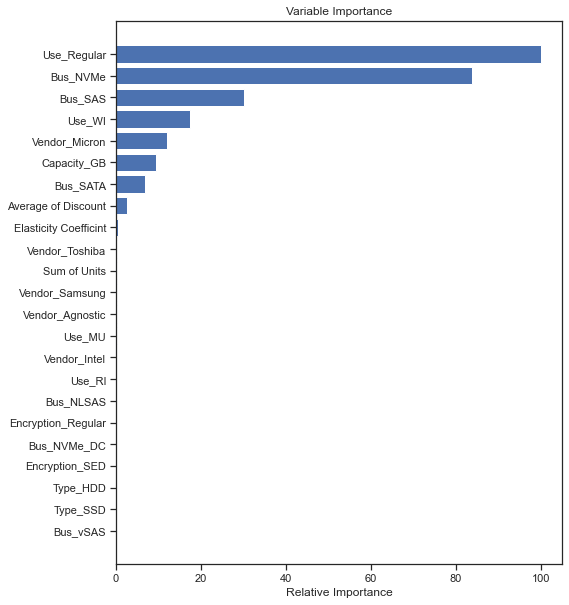

In [ ]:
feature_importance = xgb_fit.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train[cols].keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
pred_trn = xgb_fit.predict(X_train[cols])
pred_tst = xgb_fit.predict(X_test[cols])

pred_trn = pd.DataFrame(pred_trn)
pred_tst = pd.DataFrame(pred_tst)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
rmse_trn = mean_squared_error(y_train, pred_trn, squared=False)
print(rmse_trn)
rmse_tst = mean_squared_error(y_test, pred_tst, squared=False)
print(rmse_tst)

0.005707262145310022
895.6697191565988


In [ ]:
X_train.shape[0], X_test.shape[0], len(cols)

(73, 40, 23)

In [ ]:
train.loc[5:6][cols], train.loc[5:6]["Average of New Price"]

(   Capacity_GB  Sum of Units  Average of Discount  Elasticity Coefficint  \
 5         3840           122                  0.6                   1.06   
 6         3840           106                  0.6                   1.17   
 
    Vendor_Agnostic  Vendor_Intel  Vendor_Micron  Vendor_Samsung  \
 5                1             0              0               0   
 6                1             0              0               0   
 
    Vendor_Toshiba  Encryption_Regular  ...  Use_Regular  Use_WI  Type_HDD  \
 5               0                   1  ...            0       0         0   
 6               0                   1  ...            0       0         0   
 
    Type_SSD  Bus_NLSAS  Bus_NVMe  Bus_NVMe_DC  Bus_SAS  Bus_SATA  Bus_vSAS  
 5         1          0         0            0        0         0         1  
 6         1          0         0            1        0         0         0  
 
 [2 rows x 23 columns], 5    4653.3
 6    3779.0
 Name: Average of New Price, dtype: floa

Adj R-sq Calculation

In [ ]:
def calc_adj_rsq(ytr, yts, ptr,pts, ncol =None, nrowtr = None, nrowts =None):
    trcalc = pd.DataFrame()
    tscalc = pd.DataFrame()
    trcalc['y'] = ytr.reset_index(drop =True)
    trcalc['pr'] = ptr
    trcalc['mean'] = np.mean(ytr)

    tscalc['y'] = yts.reset_index(drop =True)
    tscalc['pr'] = pts
    tscalc['mean'] = np.mean(yts)
    
    ssr1 = np.sum(np.power((trcalc['y'] -  trcalc['pr']),2))
    ssr2 = np.sum(np.power((tscalc['y'] -  tscalc['pr']),2))

    sst1 = np.sum(np.power((trcalc['y'] -  trcalc['mean']),2))
    sst2 = np.sum(np.power((tscalc['y'] -  tscalc['mean']),2))  

    r2_tr = 1 - (ssr1/sst1)
    r2_ts = 1 - (ssr2/sst2) 

    # r2_score(y_train, pred_trn)
    r2_adj_tr = 1 - (1- r2_tr)*(nrowtr-1)/(nrowtr- ncol-1)
    
    # r2_ts =  r2_score(y_test, pred_tst)
    r2_adj_ts = 1 - (1- r2_ts)*(nrowts-1)/(nrowts- ncol-1)
    

    return r2_tr,  r2_ts,r2_adj_tr,r2_adj_ts


In [ ]:
calc_adj_rsq(y_train, y_test, pred_trn,pred_tst, ncol =len(cols), nrowtr = X_train.shape[0], nrowts =X_test.shape[0])

(0.9999999999931816,
 0.7916103817554913,
 0.9999999999899811,
 0.49205030552900997)

In [ ]:
xgb_cl = xgb.XGBRegressor(missing = -999)
xgb_cl

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=-999, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

## (0.9999648302658805, 0.9969429765754155, 0.999944733274955, 0.9934492355187475)

## Hyper-parameter Optimization - 1

In [ ]:
import time

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
# from xgboost import XGBClassifier

xgb_cl = xgb.XGBRegressor(missing = -999)

param_grid_xgb = {
        'silent': [False],
        'max_depth': [2,3,4,5,6],
        'learning_rate': [0.001, 0.01, 0.03, 0.05,0.08, 0.1],
        'subsample': [0.5, 0.6, 0.7, 0.8],
        'colsample_bytree': [0.2,0.4, 0.5, 0.6, 0.7, 0.8],
        'colsample_bylevel': [0.2,0.4, 0.5, 0.6, 0.7, 0.8],
        'min_child_weight': [0.1,0.3,0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.01,0.05,0.1,0.5, 1.0, 5.0, 10.0, 50.0],
        'reg_alpha':[0.01,0.05,0.1,0.5, 1.0, 5.0, 10.0, 50.0],
        'n_estimators': [100,200,300,500,700,1000]}


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
folds =5
skf = KFold(n_splits=folds, shuffle = True, random_state = 42)
# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)
xgb_cv = RandomizedSearchCV(xgb_cl, param_grid_xgb, n_iter=600,
                            n_jobs=-1, verbose=2, cv=skf.split(X_train[cols], y_train),
                            scoring='neg_root_mean_squared_error', refit=False, random_state=42)  
print("Randomized search..")
search_time_start = time.time() 
xgb_cv.fit(X_train[cols], y_train)
print("Randomized search time:", time.time() - search_time_start)

best_score = xgb_cv.best_score_
best_params = xgb_cv.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Randomized search..
Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 634 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 1328 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 2788 tasks      | elapsed:   33.6s


Randomized search time: 35.63951897621155
Best score: -918.0593765231922
Best params: 
colsample_bylevel: 0.8
colsample_bytree: 0.6
gamma: 1.0
learning_rate: 0.03
max_depth: 3
min_child_weight: 0.5
n_estimators: 700
reg_alpha: 10.0
reg_lambda: 0.1
silent: False
subsample: 0.7


[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:   35.5s finished


In [ ]:
# fit model on training data using the best hyperparameters with tweaking a little bit
model_xgb = xgb.XGBRegressor(max_depth=best_params['max_depth'] , learning_rate=best_params['learning_rate'], n_estimators=best_params['n_estimators'], verbosity=1, 
                      objective='reg:linear', booster='gbtree', tree_method='auto', n_jobs=-1,
                      eval_metric = 'rmse',
                      gamma=best_params['gamma'], min_child_weight=best_params['min_child_weight'], 
                      subsample=best_params['subsample'], 
                      colsample_bytree= best_params['colsample_bytree'], colsample_bylevel=best_params['colsample_bylevel'] ,
                      reg_alpha=0, reg_lambda=best_params['reg_lambda'], scale_pos_weight=1,  
                      alpha  = best_params['reg_alpha'],
                     random_state=42, missing=-999, num_parallel_tree=2, importance_type='gain')

# model_xgb.fit(X_train[low_vif_vars], y_train)
xgb_fit = model_xgb.fit(X_train[cols], y_train)

[22:57:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[22:57:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
pred_trn = xgb_fit.predict(X_train[cols])
pred_tst = xgb_fit.predict(X_test[cols])

pred_trn = pd.DataFrame(pred_trn)
pred_tst = pd.DataFrame(pred_tst)

In [ ]:
rmse_trn = mean_squared_error(y_train, pred_trn, squared=False)
print(rmse_trn)
rmse_tst = mean_squared_error(y_test, pred_tst, squared=False)
print(rmse_tst)

41.956455726803654
759.2156575573357


In [ ]:
calc_adj_rsq(y_train, y_test, pred_trn,pred_tst, ncol =len(cols), nrowtr = X_train.shape[0], nrowts =X_test.shape[0])

(0.9996315067047687, 0.8502693852561845, 0.99945854046415, 0.6350316265619496)

In [ ]:
 ############################################################################################

## 2-stage Hyperparameter optimization

In [ ]:
##  Stage 1: Tune the complexity parameters
import time

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
# from xgboost import XGBClassifier

xgb_cl = xgb.XGBRegressor(missing = -999)

param_grid_xgb = {
        'silent': [False],
        'max_depth': [2,3,4,5,6],
        # 'learning_rate': [0.001, 0.01, 0.03, 0.05,0.08, 0.1],
        'subsample': [0.5, 0.6, 0.7, 0.8],
        'colsample_bytree': [0.2,0.4, 0.5, 0.6, 0.7, 0.8],
        'colsample_bylevel': [0.2,0.4, 0.5, 0.6, 0.7, 0.8],
        'min_child_weight': [0.1,0.3,0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.01,0.05,0.1,0.5, 1.0, 5.0, 10.0, 50.0],
        'reg_alpha':[0.01,0.05,0.1,0.5, 1.0, 5.0, 10.0, 50.0]
        # 'n_estimators': [100,200,300,500,700,1000]
}

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
folds =5
skf = KFold(n_splits=folds, shuffle = True, random_state = 42)
# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)
xgb_cv = RandomizedSearchCV(xgb_cl, param_grid_xgb, n_iter=600,
                            n_jobs=-1, verbose=2, cv=skf.split(X_train[cols], y_train),
                            scoring='neg_root_mean_squared_error', refit=False, random_state=42)  
print("Randomized search..")
search_time_start = time.time() 
xgb_cv.fit(X_train[cols], y_train)
print("Randomized search time:", time.time() - search_time_start)

best_score = xgb_cv.best_score_
best_params = xgb_cv.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Randomized search..
Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:    4.4s


Randomized search time: 8.453977346420288
Best score: -964.2417836447145
Best params: 
colsample_bylevel: 0.5
colsample_bytree: 0.8
gamma: 1.0
max_depth: 3
min_child_weight: 1.0
reg_alpha: 0.05
reg_lambda: 0.5
silent: False
subsample: 0.8


[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:    8.3s finished


In [ ]:
## Stage 2: learning rate and n_estimator optimization
import time
from sklearn.model_selection import RandomizedSearchCV

xgb1_1 = xgb.XGBRegressor(missing = -999)

param_grid_xgb_1 = {
            'silent': [False],
        'max_depth': [best_params['max_depth'], best_params['max_depth']],
         'learning_rate': [0.001, 0.01, 0.03, 0.05,0.08, 0.1],
        'subsample': [best_params['subsample'], best_params['subsample']],
        'colsample_bytree': [best_params['colsample_bytree'], best_params['colsample_bytree']],
        'colsample_bylevel': [best_params['colsample_bylevel'], best_params['colsample_bylevel']],
        'min_child_weight': [best_params['min_child_weight'], best_params['min_child_weight']],
        'gamma': [best_params['gamma'], best_params['gamma']],
        'reg_lambda': [best_params['reg_lambda'], best_params['reg_lambda']],
        'reg_alpha':[best_params['reg_alpha'], best_params['reg_alpha']],
        'n_estimators': [100,200,300,500,700,1000]
 
}

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
folds =5
skf = KFold(n_splits=folds, shuffle = True, random_state = 42)
# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)
xgb_cv = RandomizedSearchCV(xgb1_1, param_grid_xgb_1, n_iter=600,
                            n_jobs=-1, verbose=2, cv=skf.split(X_train[cols], y_train),
                            scoring='neg_root_mean_squared_error', refit=False, random_state=42)  
print("Randomized search..")
search_time_start = time.time() 
xgb_cv.fit(X_train[cols], y_train)
print("Randomized search time:", time.time() - search_time_start)

best_score = xgb_cv.best_score_
best_params = xgb_cv.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Randomized search..
Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 1316 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 2448 tasks      | elapsed:   25.2s


Randomized search time: 30.421827793121338
Best score: -956.5216476915421
Best params: 
colsample_bylevel: 0.5
colsample_bytree: 0.8
gamma: 1.0
learning_rate: 0.1
max_depth: 3
min_child_weight: 1.0
n_estimators: 700
reg_alpha: 0.05
reg_lambda: 0.5
silent: False
subsample: 0.8


[Parallel(n_jobs=-1)]: Done 2985 out of 3000 | elapsed:   30.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:   30.3s finished


In [ ]:
# fit model on training data using the best hyperparameters with tweaking a little bit
model_xgb = xgb.XGBRegressor(max_depth=best_params['max_depth'] ,learning_rate=best_params['learning_rate'], n_estimators=best_params['n_estimators'],
                             verbosity=1, 
                      objective='reg:linear', booster='gbtree', tree_method='auto', n_jobs=-1,
                      eval_metric = 'rmse',
                      gamma=best_params['gamma'], min_child_weight=best_params['min_child_weight'], 
                      subsample=best_params['subsample'], 
                      colsample_bytree= best_params['colsample_bytree'], colsample_bylevel=best_params['colsample_bylevel'] ,
                      reg_alpha=0, reg_lambda=best_params['reg_lambda'], scale_pos_weight=1,  
                      alpha  = best_params['reg_alpha'],
                     random_state=42, missing=-999, num_parallel_tree=2, importance_type='gain')

# model_xgb.fit(X_train[low_vif_vars], y_train)
xgb_fit = model_xgb.fit(X_train[cols], y_train)

[22:58:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


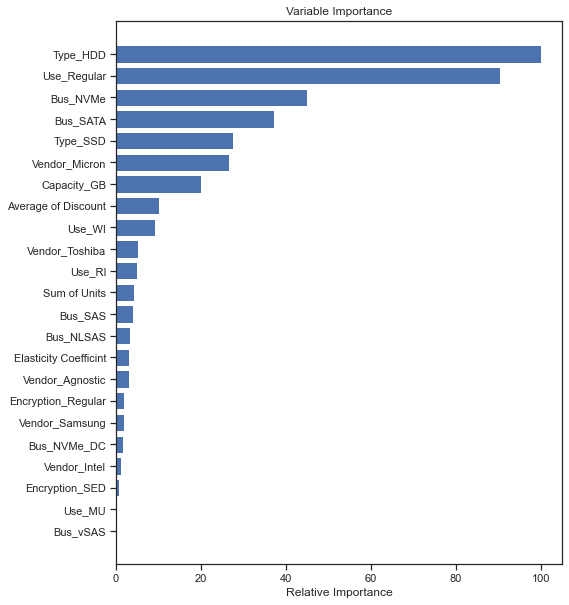

In [ ]:
feature_importance = xgb_fit.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(8, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train[cols].keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
pred_trn = xgb_fit.predict(X_train[cols])
pred_tst = xgb_fit.predict(X_test[cols])

pred_trn = pd.DataFrame(pred_trn)
pred_tst = pd.DataFrame(pred_tst)

In [ ]:
rmse_trn = mean_squared_error(y_train, pred_trn, squared=False)
print(rmse_trn)
rmse_tst = mean_squared_error(y_test, pred_tst, squared=False)
print(rmse_tst)

0.8987556383060584
750.3335261853777


In [ ]:
calc_adj_rsq(y_train, y_test, pred_trn,pred_tst, ncol =len(cols), nrowtr = X_train.shape[0], nrowts =X_test.shape[0])

(0.9999998309110381, 0.8537523153312927, 0.9999997515427498, 0.643521268620026)

In [ ]:
## It seems that the basic xgb model with default hyper-parameters is the best one as of now  

In [ ]:
####################################################################################################################
####################################################################################################################

In [ ]:
# Sensitivity Analysis by Variables

In [ ]:
df_sens = (pd.DataFrame(train.loc[5:6][cols]))
df_sens

,Capacity_GB,Sum of Units,Average of Discount,Elasticity Coefficint,Vendor_Agnostic,Vendor_Intel,Vendor_Micron,Vendor_Samsung,Vendor_Toshiba,Encryption_Regular,Encryption_SED,Use_MU,Use_RI,Use_Regular,Use_WI,Type_HDD,Type_SSD,Bus_NLSAS,Bus_NVMe,Bus_NVMe_DC,Bus_SAS,Bus_SATA,Bus_vSAS
5,3840,122,0.6,1.06,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
6,3840,106,0.6,1.17,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0


In [ ]:
pd.options.display.max_columns = 1000

In [ ]:
# Variable Name : Capacity_GB(by Avg Average of New Price)
# #######################################################################
#          Capacity_GB  Average of New Price
# 0   (239.999, 480.0]           1054.500000
# 1     (480.0, 924.0]           1811.883333
# 2     (924.0, 960.0]           1256.787500
# 3    (960.0, 1600.0]           2591.150000
# 4   (1600.0, 1920.0]           2505.910000
# 5   (1920.0, 3200.0]           3456.088889
# 6   (3200.0, 3840.0]           4696.846154
# 7   (3840.0, 6320.0]           2617.966667
# 8  (6320.0, 14000.0]           4127.800000
df_sens.loc[6,"Capacity_GB"] =  5000
df_sens.loc[5,"Capacity_GB"] =  2000
# [2525.8706, 4005.8962]  ; price increases when capacity is decreased


df_sens

,Capacity_GB,Sum of Units,Average of Discount,Elasticity Coefficint,Vendor_Agnostic,Vendor_Intel,Vendor_Micron,Vendor_Samsung,Vendor_Toshiba,Encryption_Regular,Encryption_SED,Use_MU,Use_RI,Use_Regular,Use_WI,Type_HDD,Type_SSD,Bus_NLSAS,Bus_NVMe,Bus_NVMe_DC,Bus_SAS,Bus_SATA,Bus_vSAS
5,2000,122,0.6,1.06,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
6,5000,106,0.6,1.17,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0


In [ ]:
#       Average of New Price
# Type                      
# HDD            1071.309524
# SSD            2937.047826

# 4254.4575, 2654.0886 ; with HDD decreases the price
df_sens.loc[6,"Type_HDD"] =  1
df_sens.loc[5,"Type_HDD"] =  0
df_sens

In [ ]:
#          Average of New Price
# Use                          
# MU                3089.770588
# RI                2789.046000
# Regular           1071.309524
# WI                3212.987500

# 4254.4575, 2085.3364 ; with  Regular, decreases the price
df_sens.loc[6,"Use_Regular"] =  1
df_sens.loc[5,"Use_Regular"] =  0
df_sens

,Capacity_GB,Sum of Units,Average of Discount,Elasticity Coefficint,Vendor_Agnostic,Vendor_Intel,Vendor_Micron,Vendor_Samsung,Vendor_Toshiba,Encryption_Regular,Encryption_SED,Use_MU,Use_RI,Use_Regular,Use_WI,Type_HDD,Type_SSD,Bus_NLSAS,Bus_NVMe,Bus_NVMe_DC,Bus_SAS,Bus_SATA,Bus_vSAS
5,3840,122,0.6,1.06,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
6,3840,106,0.6,1.17,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0


In [ ]:
# Variable Name : Average of Discount(by Avg Average of New Price)
# #######################################################################
#   Average of Discount  Average of New Price
# 0        (0.399, 0.5]           1257.108824
# 1          (0.5, 0.6]           2820.657143
# 2          (0.6, 0.9]           4000.321739

# 3596.4705, 3945.4705]; with increase in avg discount price increases

df_sens.loc[5,"Average of Discount"] =  0.1
df_sens.loc[6,"Average of Discount"] =  0.9
df_sens

,Capacity_GB,Sum of Units,Average of Discount,Elasticity Coefficint,Vendor_Agnostic,Vendor_Intel,Vendor_Micron,Vendor_Samsung,Vendor_Toshiba,Encryption_Regular,Encryption_SED,Use_MU,Use_RI,Use_Regular,Use_WI,Type_HDD,Type_SSD,Bus_NLSAS,Bus_NVMe,Bus_NVMe_DC,Bus_SAS,Bus_SATA,Bus_vSAS
5,3840,122,0.1,1.06,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
6,3840,106,0.9,1.17,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0


In [ ]:
xgb_fit.predict(df_sens) # [4254.4575, 3763.9792]

array([3596.4705, 3945.4705], dtype=float32)

In [ ]:
##########################################################################################

In [ ]:
trcalc = pd.DataFrame()
tscalc = pd.DataFrame()
trcalc['y'] = y_train.reset_index(drop =True)
trcalc['pr'] = pred_trn
trcalc['mean'] = np.mean(y_train)

tscalc['y'] = y_test.reset_index(drop =True)
tscalc['pr'] = pred_tst
tscalc['mean'] = np.mean(y_test)

In [ ]:
ssr1 = np.sum(np.power((trcalc['y'] -  trcalc['pr']),2))
ssr2 = np.sum(np.power((tscalc['y'] -  tscalc['pr']),2))

In [ ]:
ssr1 , ssr2

(11809.709043941664, 485212.9857472368)

In [ ]:
sst1 = np.sum(np.power((trcalc['y'] -  trcalc['mean']),2))
sst2 = np.sum(np.power((tscalc['y'] -  tscalc['mean']),2))

In [ ]:
sst1 , sst2

(335791820.4274627, 158720728.74717388)

In [ ]:
np.mean(y_train), X_train.shape[0], X_test.shape[0], len(cols)

(2823.050746268657, 67, 46, 24)

In [ ]:
r2_tr = 1 - (ssr1/sst1)
r2_ts = 1 - (ssr2/sst2)
print(r2_tr)
print(r2_ts)
# r2_score(y_train, pred_trn)
r2_adj_tr = 1 - (1- r2_tr)*(X_train.shape[0]-1)/(X_train.shape[0]- len(cols)-1)
print(r2_adj_tr)
# r2_ts =  r2_score(y_test, pred_tst)
r2_adj_ts = 1 - (1- r2_ts)*(X_test.shape[0]-1)/(X_test.shape[0]- len(cols)-1)
print(r2_adj_ts)

0.9999648302658805
0.9969429765754155
0.999944733274955
0.9934492355187475


In [ ]:
## Since there is little data we see overfitting here
## the last model with 2-stage hyperparameter 